In [63]:
# Importing the cancer data set

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Importing the cancer data set

from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

In [18]:
# Print the full description of the dataset

print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [19]:
# Take a look at the data set
breast_cancer # The data looks like a dictionary. It contains key-value pairs.

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [26]:
# What is the type of the data set?
type(breast_cancer) # sklearn.utils.Bunch: Container object exposing keys as attributes

sklearn.utils.Bunch

### Quick check the data set

In [20]:
# The data has 30 features
len(breast_cancer.feature_names) # Match the count of feature names

30

In [21]:
# The data has 569 instances
len(breast_cancer.data) # Match and the dtype of the data looks like numpy array

569

In [22]:
# The dtype of the features
type(breast_cancer.data) # Confirmed

numpy.ndarray

In [24]:
# 212 instances are malignant and 357 are benign
len(breast_cancer.data[breast_cancer.target == 0]) # 0 represnt malignant

212

In [25]:
len(breast_cancer.data[breast_cancer.target == 1]) # 1 represnt benign

357

### How do the features affect the target?
- Plot histograms of malignant and benign classes.
- If the two histograms are separated based on the feature, then the feature is important to discern the instances.

In [28]:
# define malignant and benign
malignant = breast_cancer.data[breast_cancer.target == 0]
benign = breast_cancer.data[breast_cancer.target == 1]

In [37]:
# np.histogram is used to compute the histogram of a set of data
np.histogram(breast_cancer.data[:, 1], bins=40)

(array([ 2,  5,  3,  7, 24, 19, 22, 31, 38, 34, 40, 42, 42, 38, 36, 29, 36,
        18, 16, 19, 18,  8,  6,  8,  9,  6,  4,  2,  3,  0,  1,  0,  2,  0,
         0,  0,  0,  0,  0,  1]),
 array([ 9.71   , 10.44925, 11.1885 , 11.92775, 12.667  , 13.40625,
        14.1455 , 14.88475, 15.624  , 16.36325, 17.1025 , 17.84175,
        18.581  , 19.32025, 20.0595 , 20.79875, 21.538  , 22.27725,
        23.0165 , 23.75575, 24.495  , 25.23425, 25.9735 , 26.71275,
        27.452  , 28.19125, 28.9305 , 29.66975, 30.409  , 31.14825,
        31.8875 , 32.62675, 33.366  , 34.10525, 34.8445 , 35.58375,
        36.323  , 37.06225, 37.8015 , 38.54075, 39.28   ]))

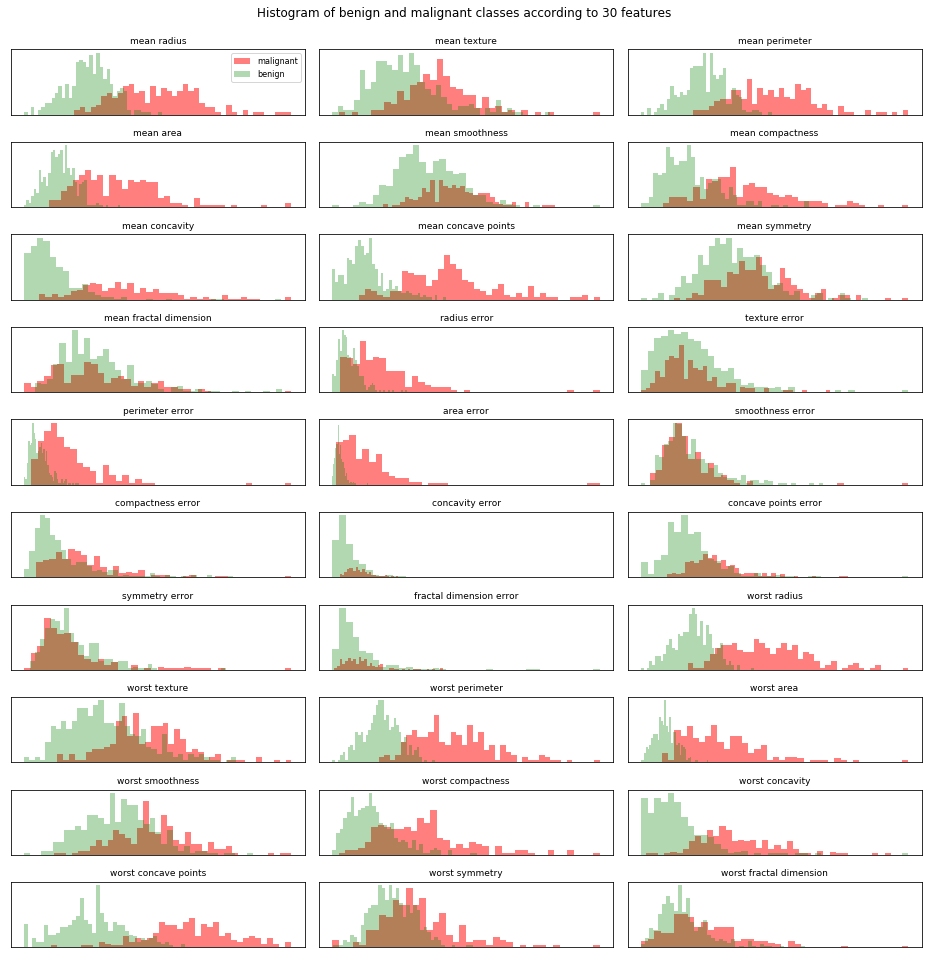

In [60]:
fig, axes = plt.subplots(10, 3, figsize=(13,13)) 

# Set the super title
fig.suptitle('Histogram of benign and malignant classes according to 30 features', y = 1.02) 

ax = axes.ravel() # Flatten axes to a 1D array

for i in range(30):
    ax[i].hist(malignant[:, i], bins=40, color='r', alpha=0.5) # red color for malignant class
    ax[i].hist(benign[:, i], bins=40, color='g', alpha=0.3) # green color for benign class
    ax[i].set_title(breast_cancer.feature_names[i], fontsize=9)
    ax[i].axes.get_xaxis().set_visible(False) # Make the x-axis invisible
    ax[i].set_yticks(())
    
ax[0].legend(['malignant', 'benign'], loc='best', fontsize=8)
plt.tight_layout()
plt.show()

**Takeaways**
1. Features like mean fractal dimention have very little role to play in discerning the two classes. 
2. Features like worst concanvity can give us strong hint about the separation of two classes.

**In a dataset, there are high possibilityes for some features to be correlated.**<br>
Below are the examples

In [64]:
# Convert the np.array into pd dataframe
df = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [70]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

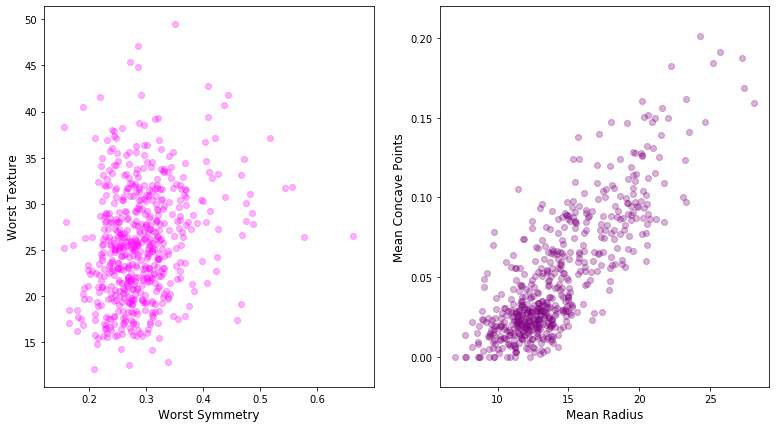

In [102]:
fig, axs = plt.subplots(1,2, figsize=(13, 7))

axs[0].scatter(data=df, x='worst symmetry', y='worst texture',
               color='magenta', label='check', alpha=0.3)
axs[0].set_xlabel('Worst Symmetry',fontsize=12)
axs[0].set_ylabel('Worst Texture',fontsize=12)

axs[1].scatter(data=df, x='mean radius', y='mean concave points', 
               color='purple', alpha=0.3)
axs[1].set_xlabel('Mean Radius',fontsize=12)
axs[1].set_ylabel('Mean Concave Points',fontsize=12)

plt.show()

### PCA is essentially a method that reduces the dimention of the feature space in such as way that new variables are orthogonal or independent or not correlated to each other.
- Reduce 30 features to 3 principle features
- Visualize the scatter plot of these new independent variables